# Analyse der Schlafeffizienz 

## Inhaltsverzeichnis
1. [Einleitung](#1-einleitung)
2. [Imports und Setup](#2-imports-und-setup)
3. [Daten laden](#3-daten-laden)
4. [Erste Datensichtung](#4-erste-datensichtung)
5. [Prüfung der Datenqualität](#5-prüfung-der-datenqualität)
6. [Datenbereinigung](#6-datenbereinigung)
7. [Datenanalyse](#7-laut-google-explorativ-datenanalyse)
   - [7.1 Verteilung der Schlafeffizienz](#71-verteilung-der-schlafeffizienz)
   - [7.2 Korrelationen](#72-korrelationen)
8. [Hypothesentests](#8-(hypothesentests-stimmt-annahme))
   - [8.1 Sporteffekt](#81-sporteffekt)
   - [8.2 Konsumeffekte](#82-konsumeffekte)
   - [8.3 Alterseffekt](#83-alterseffekt)
9. [Visualisierungen](#9-visualisierungen)
10. [Machine Learning Modelle](#10-machine-learning-modelle)
    - [10.1 Datenvorbereitung](#101-datenvorbereitung-für-machine-learning)
    - [10.2 Random Forest Modell](#102-random-forest-modell)
    - [10.3 Lineare Regression](#103-lineare-regression-alternative-methode)
    - [10.4 Vergleich der Modelle](#104-vergleich-der-modelle)
    - [10.5 K-Means Clustering](#105-k-means-clustering-dritte-ml-methode)
11. [Zusammenfassung](#11-zusammenfassung-und-schlussfolgerungen)
    - [11.1 Hauptergebnisse](#111-hauptergebnisse)
    - [11.2 Praktische Anwendungen](#112-praktische-anwendungen)
    - [11.3 Limitationen](#113-limitationen)

# Analyse der Schlafeffizienz und Einflussfaktoren

## 1. Einleitung
### 1.1 Problemstellung und Zielsetzung
Mit der Analyse versuche ich die Faktoren, die die Schlafeffizienz beeinflussen, mit besonderem Fokus auf Lebensstilfaktoren wie Sport, Koffein- und Alkoholkonsum sowie deren Zusammenhang mit verschiedenen Altersgruppen zusammenzhängen.

### 1.2 Fragen/Überlegungen vorher
1. Personen mit höherer sportlicher Aktivität (>3x/Woche) zeigen eine deutlich bessere Schlafeffizienz 
2. Koffeinkonsum über 50mg und Alkoholkonsum über 2 Einheiten korrelieren negativ mit der Schlafeffizienz
3. Der positive Effekt von Sport auf die Schlafeffizienz ist in der Altersgruppe 31-45 am stärksten

### imports

In [163]:
# 2. Imports und Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Sry muss so kompliziert, weil Seaborn spakkt
# Grundlegende Plot-Einstellungen
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_theme(style="whitegrid")  # Das setzt einen schönen Seaborn-Style

### Datensatz importieren

In [164]:
# 3. Daten laden
# CSV einlesen und ersten Blick werfen
sleep_Efficiency = pd.read_csv('Sleep_Efficiency.csv')

### Daten Sichtung

In [165]:
# 4. Erste Datensichtung

# Die ersten 5 Zeilen anschauen - gut um die Struktur zu checken
sleep_Efficiency.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [166]:
# Die letzten 5 Zeilen - schauen ob am Ende alles passt
sleep_Efficiency.tail()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0
451,452,18,Male,2021-03-17 02:30:00,2021-03-17 10:00:00,7.5,0.63,22,23,55,1.0,50.0,0.0,No,1.0


In [167]:
# Überblick über Datentypen und fehlende Werte
sleep_Efficiency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [168]:
# Statistische Kennzahlen der numerischen Spalten
sleep_Efficiency.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


### Fehlende Werte
* Awakenings
* Caffeine Consumption
* Alcohol Consumption
* Excercise frequency

### Visualisierung

<Axes: >

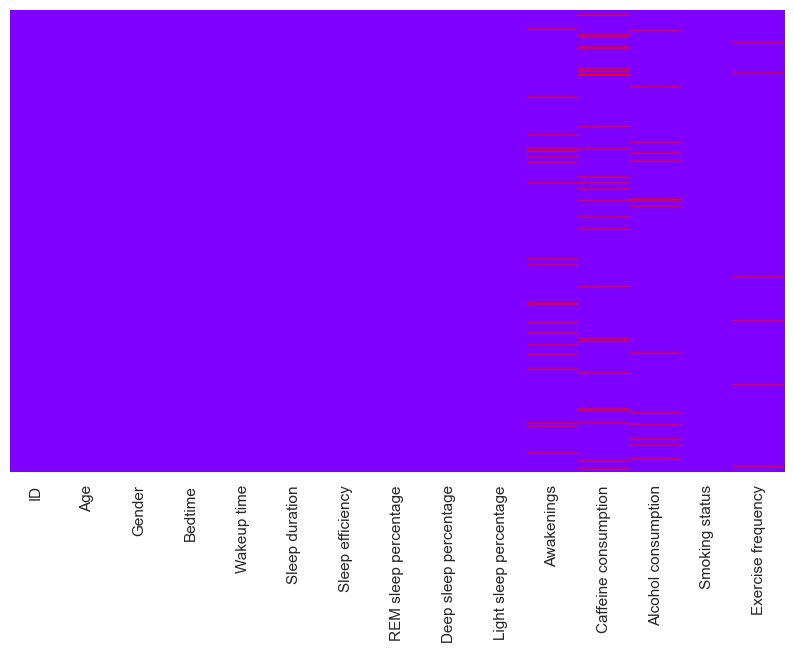

In [169]:
sns.heatmap(sleep_Efficiency.isnull(), yticklabels= False, cbar=False, cmap='rainbow') # Visualisierung der  fehlenden Werte als Heatmap

### Daten auffüllen

# 5

Addiert die Schlafphasen (REM + Tief + Leicht) und prüft, ob sie 100% ergeben
Findet Ausreißer bei:
Schlafeffizienz
Schlafdauer
Tiefschlaf
Die Ausreißer werden über die IQR-Methode gefunden: Werte die stark vom Durchschnitt abweichen, werden markiert.
Am Ende zeigt der Code an, wie viele Ausreißer es gibt und ob die Schlafphasen-Summen stimmen.

In [170]:
# 5.Prüfung der Datenqualität
def check_data_quality():
   # Check 1: Schlafphasen sollten sich zu 100% addieren
   # REM + Tief + Leicht = 100% bedeutet vollständige Daten
   sum_phases = (sleep_Efficiency['REM sleep percentage'] + 
                sleep_Efficiency['Deep sleep percentage'] + 
                sleep_Efficiency['Light sleep percentage'])
   print(f"Schlafphasen-Summe (Min/Max): {sum_phases.min():.0f}% / {sum_phases.max():.0f}%")
   
   # Check 2 Finden krasser Werte (Ausreißer)
   # Identifiziert Werte die stark vom Durchschnitt abweichen
   # und möglicherweise fehlerhaft sind
   for col in ['Sleep efficiency', 'Sleep duration', 'Deep sleep percentage']:
       Q1 = sleep_Efficiency[col].quantile(0.25)  # Unteres Viertel
       Q3 = sleep_Efficiency[col].quantile(0.75)  # Oberes Viertel
       IQR = Q3 - Q1  # Abstand zwischen den Vierteln
       outliers = sleep_Efficiency[(sleep_Efficiency[col] < (Q1 - 1.5 * IQR)) | 
                                 (sleep_Efficiency[col] > (Q3 + 1.5 * IQR))]
       print(f"{col}: {len(outliers)} Ausreißer")

# Ausf#hrung
check_data_quality()

Schlafphasen-Summe (Min/Max): 100% / 100%
Sleep efficiency: 0 Ausreißer
Sleep duration: 16 Ausreißer
Deep sleep percentage: 60 Ausreißer


# 6

Füllt fehlende Werte mit Median, Durchschnitt oder häufigsten Wert je nach Spalte
Entfernt Ausreißer bei Schlafeffizienz, -dauer und Tiefschlaf durch IQR-Methode: Extreme Werte werden auf einen vernünftigen Bereich begrenzt
Teilt das Alter in 4 Gruppen ein: 18-30, 31-45, 46-60 und 61+
Das bereinigte Ergebnis wird in sleep_Efficiency_clean gespeichert.

In [171]:
# 6. Datenbereinigung
def clean_data(df):
   df = df.copy()
   
   # Fehlende Werte auffüllen:
   # Median = Wert in der Mitte wenn alle Zahlen sortiert sind
   # Mean/Mittelwert = Durchschnitt aller Werte
   # Mode = Wert der am häufigsten vorkommt 
   df['Awakenings'] = df['Awakenings'].fillna(df['Awakenings'].median())
   df['Caffeine consumption'] = df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean())
   df['Alcohol consumption'] = df['Alcohol consumption'].fillna(df['Alcohol consumption'].median())
   df['Exercise frequency'] = df['Exercise frequency'].fillna(df['Exercise frequency'].mode()[0])
   
   # Ausreißer behandeln:
   # Q1 = 25% der Daten liegen darunter
   # Q3 = 75% der Daten liegen darunter
   # IQR = Abstand zwischen Q1 und Q3
   # Alles was 1.5*IQR über Q3 oder unter Q1 liegt wird angepasst
   wichtige_spalten = ['Sleep efficiency', 'Sleep duration', 'Deep sleep percentage']
   for col in wichtige_spalten:
       Q1 = df[col].quantile(0.25)
       Q3 = df[col].quantile(0.75)
       IQR = Q3 - Q1
       df[col] = df[col].clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
   
   # Alter in Gruppen einteilen damit man es besser vergleichen kann
   df['Age_Group'] = pd.cut(df['Age'], 
                           bins=[0, 30, 45, 60, np.inf], 
                           labels=['18-30', '31-45', '46-60', '61+'])
   
   return df

# Daten bereinigen und in neuem DataFrame speichern
sleep_Efficiency_clean = clean_data(sleep_Efficiency)


# 7

Visualisiert die Verteilung der Schlafeffizienz mit Histogramm:
Hohe Balken zeigen häufige Effizienzwerte Breite Verteilung deutet auf große Unterschiede hin Schmale Verteilung zeigt ähnliche Schlafmuster Das Plot hilft halt auch die typische Schlafeffizienz und ihre Schwankungen zu verstehen.

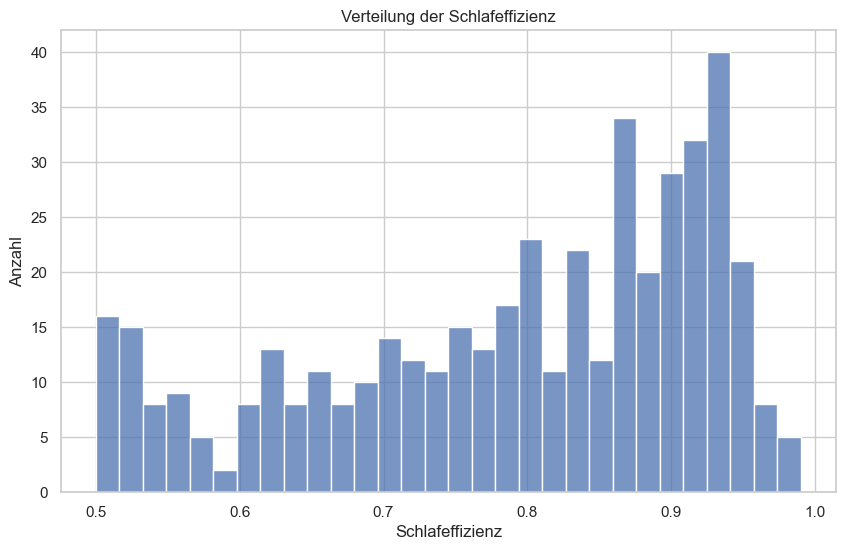

In [172]:
# 7.Datenanalyse 

# 7.1 Verteilung der Schlafeffizienz 
# Histogramm zeigt wie oft welcher Wert vorkommt
# Je höher der Balken, desto mehr Leute haben diesen Effizienzwert
# Breite Verteilung = große Unterschiede zwischen Leuten
# Schmale Verteilung = ähnliche Werte bei vielen Leuten
plt.figure(figsize=(10, 6))
sns.histplot(data=sleep_Efficiency_clean, x='Sleep efficiency', bins=30)
plt.title('Verteilung der Schlafeffizienz')
plt.xlabel('Schlafeffizienz')
plt.ylabel('Anzahl')
plt.show()

# 7.2

Code analysiert Zusammenhänge in den Schlafdaten:
Erstellt eine Korrelationsmatrix für alle Zahlenwerte
Zeigt diese als Heatmap (rot = positive Korrelation, blau = negative)
Berechnet die durchschnittliche Schlafeffizienz
Listet alle Korrelationen mit Schlafeffizienz sortiert nach Stärke
Die Heatmap zeigt auf einen Blick, welche Faktoren stark zusammenhängen.

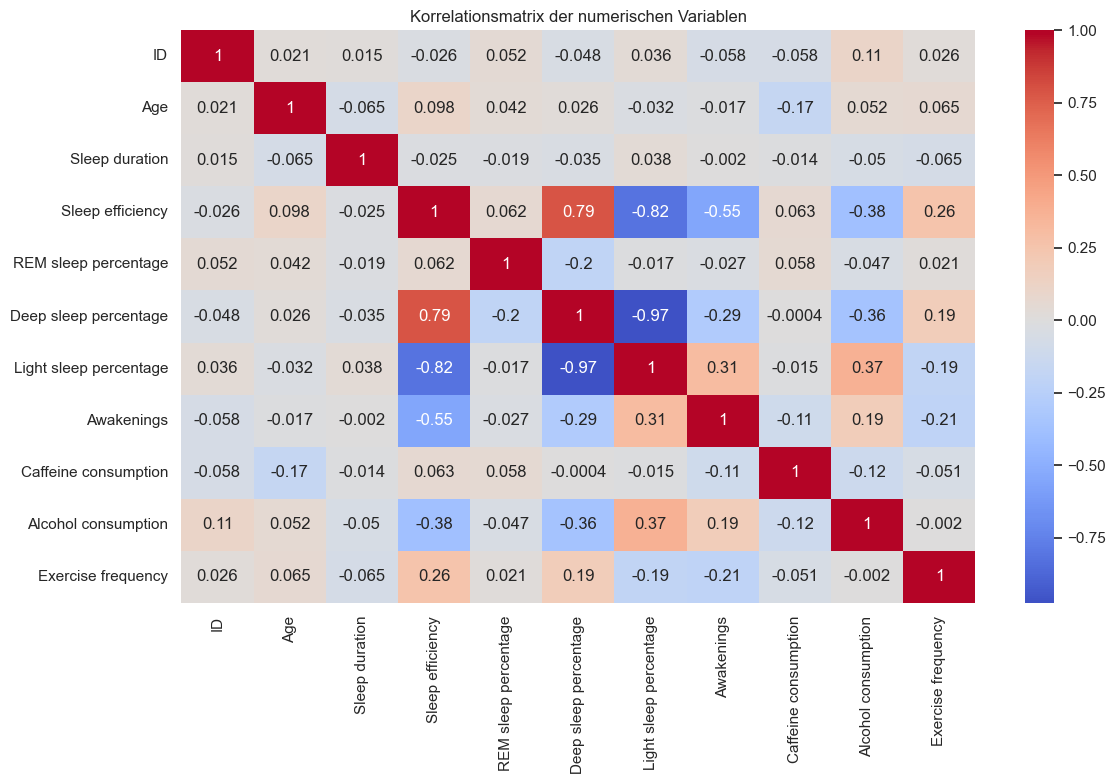

Durchschnittliche Schlafeffizienz: 0.79

Korrelationen mit Schlafeffizienz:
Sleep efficiency          1.000000
Deep sleep percentage     0.788332
Exercise frequency        0.255315
Age                       0.098357
Caffeine consumption      0.063121
REM sleep percentage      0.062362
Sleep duration           -0.025352
ID                       -0.025624
Alcohol consumption      -0.381249
Awakenings               -0.552179
Light sleep percentage   -0.819204
Name: Sleep efficiency, dtype: float64


In [173]:
# 7.2 Korrelationen 
# Nur numerische Spalten auswählen
numeric_columns = sleep_Efficiency_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = sleep_Efficiency_clean[numeric_columns].corr()

# Korrelationsheatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korrelationsmatrix der numerischen Variablen')
plt.tight_layout()
plt.show()

# Durchschnittliche Schlafeffizienz anzeigen
print(f"Durchschnittliche Schlafeffizienz: {sleep_Efficiency_clean['Sleep efficiency'].mean():.2f}")

# Korrelationen mit Schlafeffizienz ausgeben
sleep_corr = correlation_matrix['Sleep efficiency'].sort_values(ascending=False)
print("\nKorrelationen mit Schlafeffizienz:")
print(sleep_corr)

# 8

Code testet, ob mehr Sport zu besserem Schlaf führt:
Vergleicht zwei Gruppen:
Viel Sport (>3x pro Woche)
Wenig Sport (<1x pro Woche)
Macht einen T-Test um zu prüfen, ob der Unterschied in der Schlafeffizienz zwischen den Gruppen zufällig ist (p-Wert < 0.05 = nicht zufällig)
Zeigt die Ergebnisse:
T-Statistik (Unterschiedsgröße)
P-Wert (Zufälligkeit)
Durchschnittliche Schlafeffizienz beider Gruppen
Der Code scheint unvollständig zu sein - der letzte Teil mit dem Box-Plot fehlt.

In [174]:
# 8. Hypothesentests

# 8.1 Hypothese 1: Macht Sport den Schlaf besser?
def test_exercise_hypothesis():
  # Zwei Gruppen vergleichen:
  # Viel Sport = mehr als 3x pro Woche
  # Wenig Sport = weniger als 1x pro Woche
  high_exercise = sleep_Efficiency_clean[sleep_Efficiency_clean['Exercise frequency'] > 3]['Sleep efficiency']
  low_exercise = sleep_Efficiency_clean[sleep_Efficiency_clean['Exercise frequency'] < 1]['Sleep efficiency']
  
  # T-Test macht mathematischen Vergleich der Gruppen
  # p < 0.05 bedeutet der Unterschied ist nicht zufällig
  t_stat, p_value = stats.ttest_ind(high_exercise, low_exercise)
  
  print("=== Sport und Schlafeffizienz ===")
  print(f"T-Statistik: {t_stat:.4f}")  # Wie groß ist der Unterschied
  print(f"P-Wert: {p_value:.4f}")      # Ist der Unterschied zufällig?
  print(f"Effizienz bei viel Sport: {high_exercise.mean():.4f}")
  print(f"Effizienz bei wenig Sport: {low_exercise.mean():.4f}")

# Test machen
test_exercise_hypothesis()

=== Sport und Schlafeffizienz ===
T-Statistik: 6.1869
P-Wert: 0.0000
Effizienz bei viel Sport: 0.8765
Effizienz bei wenig Sport: 0.7439


# 8.2

Hier werden Gruppen definiert:

Viel Kaffee (>50mg Koffein)
Viel Alkohol (>2 Einheiten)
Macht T-Tests für beide Getränke:
Vergleicht Schlafeffizienz bei hohem vs. niedrigem Konsum
P-Wert zeigt ob Unterschiede zufällig sind
Zeigt die Ergebnisse für beide Tests: T-Statistik und P-Wert

In [175]:
# 8.2 Hypothese 2: Machen Kaffee und Alkohol den Schlaf schlechter?
def test_consumption_hypothesis():
   # Zwei Gruppen für jeden Test:
   # - Viel Kaffee = mehr als 50mg Koffein
   # - Viel Alkohol = mehr als 2 Einheiten 
   high_caffeine = sleep_Efficiency_clean['Caffeine consumption'] > 50  # Kaffeetrinker
   high_alcohol = sleep_Efficiency_clean['Alcohol consumption'] > 2     # Alkoholtrinker
   
   print("\n=== Effekt von Kaffee und Alkohol ===")
   
   # Test für Kaffee: 
   # Vergleicht Schlafeffizienz von Kaffeetrinkern mit Nicht-Kaffeetrinkern.
   t_stat, p_value = stats.ttest_ind(
       sleep_Efficiency_clean[high_caffeine]['Sleep efficiency'], # Viel Kaffee
       sleep_Efficiency_clean[~high_caffeine]['Sleep efficiency']   # Wenig Kaffee
   )
   print("\nKoffein-Effekt:")
   print(f"T-Statistik: {t_stat:.4f}")   # Unterschied zwischen Gruppen
   print(f"P-Wert: {p_value:.4f}") # Ist es Zufall?
   
   # Das gleiche für Alkohol
   t_stat, p_value = stats.ttest_ind(
       sleep_Efficiency_clean[high_alcohol]['Sleep efficiency'],   # Viel Alkohol
       sleep_Efficiency_clean[~high_alcohol]['Sleep efficiency'] # Wenig Alkohol
   )
   print("\nAlkohol-Effekt:")
   print(f"T-Statistik: {t_stat:.4f}")
   print(f"P-Wert: {p_value:.4f}")

# Tests machen
test_consumption_hypothesis()


=== Effekt von Kaffee und Alkohol ===

Koffein-Effekt:
T-Statistik: 2.6763
P-Wert: 0.0077

Alkohol-Effekt:
T-Statistik: -6.1860
P-Wert: 0.0000


# 8.3

Code untersucht, wie Alter und Sport zusammen den Schlaf beeinflussen:

Erstellt einen Box-Plot:
X-Achse: Altersgruppen
Y-Achse: Schlafeffizienz
Farben: Sportmenge
Berechnet und zeigt Durchschnittswerte:
Gruppiert nach Altersgruppe
Unterteilt nach Sportmenge
Zeigt durchschnittliche Schlafeffizienz
Der Box-Plot macht es einfacher, Muster und Unterschiede zu erkennen.

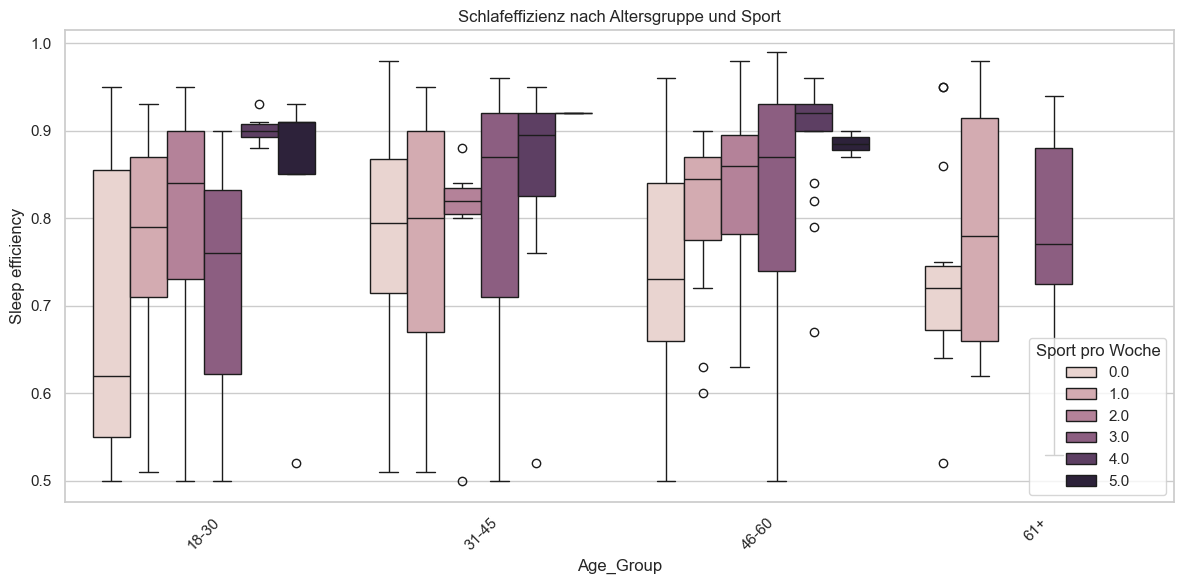


=== Alter, Sport und Schlaf ===
Durchschnittliche Schlafeffizienz:
Age_Group  Exercise frequency
18-30      0.0                   0.691111
           1.0                   0.763415
           2.0                   0.806667
           3.0                   0.716667
           4.0                   0.901667
           5.0                   0.824000
31-45      0.0                   0.786579
           1.0                   0.770000
           2.0                   0.782857
           3.0                   0.806585
           4.0                   0.862778
           5.0                   0.920000
46-60      0.0                   0.742162
           1.0                   0.809286
           2.0                   0.831429
           3.0                   0.828167
           4.0                   0.894118
           5.0                   0.885000
61+        0.0                   0.734286
           1.0                   0.790000
           2.0                        NaN
           3.0      

C:\Users\jean-noel.honisch\AppData\Local\Temp\ipykernel_4188\2859042087.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sport_effect = sleep_Efficiency_clean.groupby(['Age_Group', 'Exercise frequency'])['Sleep efficiency'].mean()


In [176]:
# 8.3 Hypothese 3: Schlafen Sportler in verschiedenen Altersgruppen unterschiedlich gut?
def analyze_age_effect():
   # Box-Plot zeigt für jede Altersgruppe:
   # Wie gut schlafen Leute mit verschiedenen Sportlevels
   # Box = mittlere 50% der Werte
   # Strich in Box = Durchschnitt
   # Punkte = Ausreißer
   plt.figure(figsize=(12, 6))
   sns.boxplot(data=sleep_Efficiency_clean, 
               x='Age_Group',              # Altersgruppen auf x-Achse 
               y='Sleep efficiency',       # Schlafeffizienz auf y-Achse
               hue='Exercise frequency')   # Farben zeigen Sportmenge
   plt.title('Schlafeffizienz nach Altersgruppe und Sport')
   plt.xticks(rotation=45)
   plt.legend(title='Sport pro Woche')
   plt.tight_layout()
   plt.show()
   
   # Durchschnittswerte ausrechnen und anzeigen
   # Gruppiert nach Alter und Sportmenge
   age_sport_effect = sleep_Efficiency_clean.groupby(['Age_Group', 'Exercise frequency'])['Sleep efficiency'].mean()
   print("\n=== Alter, Sport und Schlaf ===")
   print("Durchschnittliche Schlafeffizienz:")
   print(age_sport_effect)

# Analyse durchführen
analyze_age_effect()

# 9

Ist eine Visualisierung mit Kreis und Histogramm

erstellt zwei Visualisierungen:
Kreisdiagramm:
Zeigt die Verteilung von REM-, Tief- und Leichtschlaf
Prozente geben den durchschnittlichen Anteil an
Histogramm:
X-Achse: Uhrzeiten (0-24 Uhr)
Y-Achse: Anzahl der Menschen
Zeigt wann die meisten ins Bett gehen

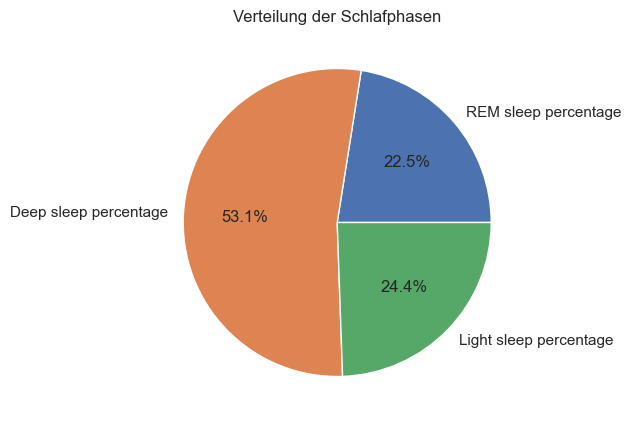

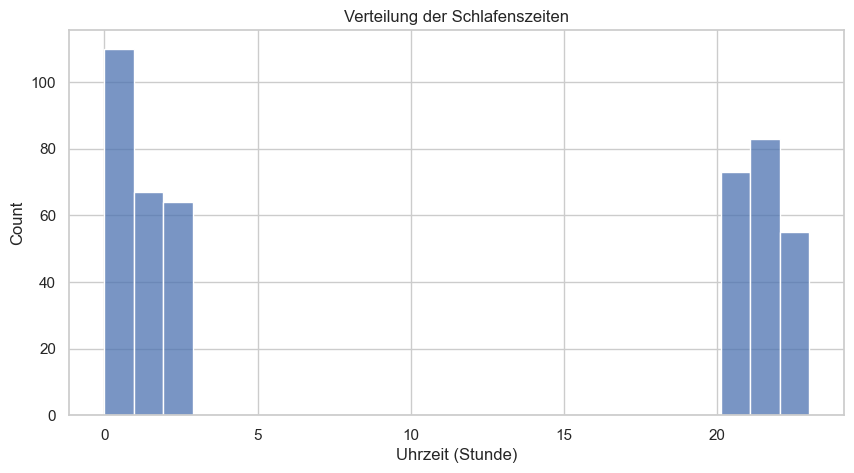

In [177]:
# 9. Visualisierungen

# Kreisdiagramm zeigt Verteilung der Schlafphasen:
# Wie viel Zeit verbringen wir in welcher Schlafphase. Prozentzahlen zeigen durchschnittlichen Anteil. etc
plt.figure(figsize=(10, 5))
sleep_phases = sleep_Efficiency_clean[['REM sleep percentage',      # Traum-Schlaf 
                                    'Deep sleep percentage',       # Tiefschlaf
                                    'Light sleep percentage']].mean()  # Leichtschlaf
plt.pie(sleep_phases, labels=sleep_phases.index, autopct='%1.1f%%')
plt.title('Verteilung der Schlafphasen')
plt.show()

# Histogramm zeigt wann Leute schlafen gehen:
# X-Achse = Uhrzeit 0-23 std
# Y-Achse = Wie viele Leute zu dieser Zeit schlafen gehen
# Hoher Balken = Beliebte Schlafenszeit
plt.figure(figsize=(10, 5))
bedtime = pd.to_datetime(sleep_Efficiency_clean['Bedtime']).dt.hour  # Uhrzeit rausgezogen
sns.histplot(data=bedtime, bins=24)  # 24 Balken für 24 Stunden
plt.title('Verteilung der Schlafenszeiten')
plt.xlabel('Uhrzeit (Stunde)')
plt.show()

## 10. Machine Learning Modelle

In diesem Abschnitt werden wir maschinelles Lernen einsetzen, um die Schlafeffizienz vorherzusagen und zu verstehen, welche Faktoren die größte Rolle spielen. Wir verwenden zwei Modelle:
1. Random Forest (Haupt-Methode)
2. Lineare Regression (Alternative Methode)

In [ ]:
# 10.1 Datenvorbereitung für Machine Learning

# Imports für Machine Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Daten für ML vorbereiten
ml_data = sleep_Efficiency_clean.copy()

# Gender in 0/1 umwandeln
ml_data['Gender'] = ml_data['Gender'].map({'Male': 0, 'Female': 1})

# Smoking status in 0/1 umwandeln
ml_data['Smoking status'] = ml_data['Smoking status'].map({'No': 0, 'Yes': 1})

# Zeitdaten in Stunden umwandeln (wir nehmen nur die Stunde)
ml_data['Bedtime_hour'] = pd.to_datetime(ml_data['Bedtime']).dt.hour
ml_data['Wakeup_hour'] = pd.to_datetime(ml_data['Wakeup time']).dt.hour

# Features auswählen
feature_columns = ['Age', 'Gender', 'Sleep duration', 'Awakenings',
                   'Caffeine consumption', 'Alcohol consumption', 
                   'Smoking status', 'Exercise frequency',
                   'Bedtime_hour', 'Wakeup_hour']

# Features und Zielwert trennen
X = ml_data[feature_columns]  # Features
y = ml_data['Sleep efficiency']  # Zielwert (was wir vorhersagen wollen)

# Daten in Trainings- und Testsets aufteilen (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Trainingsdaten: {X_train.shape[0]} Datensätze")
print(f"Testdaten: {X_test.shape[0]} Datensätze")
print(f"Features: {feature_columns}")

In [ ]:
# 10.2 Random Forest Modell

# Import falls nötig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest Modell trainieren
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Vorhersagen treffen
y_pred_rf = rf_model.predict(X_test)

# Modell bewerten
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"Mittlerer quadratischer Fehler (MSE): {mse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f} (0=schlecht, 1=perfekt)")

# Visualisierung: Vorhersage vs. tatsächliche Werte
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Tatsächliche Schlafeffizienz')
plt.ylabel('Vorhergesagte Schlafeffizienz')
plt.title('Random Forest: Tatsächliche vs. Vorhergesagte Schlafeffizienz')
plt.grid(True)
plt.show()

# Feature-Wichtigkeit anzeigen
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest: Feature-Wichtigkeit')
plt.tight_layout()
plt.show()

In [ ]:
# 10.3 Lineare Regression (Alternative Methode)

# Import falls nötig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lineare Regression trainieren
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Vorhersagen treffen
y_pred_lr = lr_model.predict(X_test)

# Modell bewerten
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Lineare Regression Performance:")
print(f"Mittlerer quadratischer Fehler (MSE): {mse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f} (0=schlecht, 1=perfekt)")

# Visualisierung: Vorhersage vs. tatsächliche Werte
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Tatsächliche Schlafeffizienz')
plt.ylabel('Vorhergesagte Schlafeffizienz')
plt.title('Lineare Regression: Tatsächliche vs. Vorhergesagte Schlafeffizienz')
plt.grid(True)
plt.show()

# Koeffizienten der linearen Regression
lr_coefficients = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_model.coef_
})
lr_coefficients = lr_coefficients.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lr_coefficients)
plt.title('Lineare Regression: Feature-Koeffizienten')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
# 10.4 Vergleich der Modelle

# Import falls nötig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Vergleichstabelle erstellen
model_comparison = pd.DataFrame({
    'Modell': ['Random Forest', 'Lineare Regression'],
    'MSE': [mse_rf, mse_lr],
    'R²': [r2_rf, r2_lr]
})

print("Modellvergleich:")
print(model_comparison)

# Visualisierung des Modellvergleichs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Modell', y='MSE', data=model_comparison)
plt.title('Vergleich: Mittlerer quadratischer Fehler (kleiner = besser)')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
sns.barplot(x='Modell', y='R²', data=model_comparison)
plt.title('Vergleich: R² Score (höher = besser)')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# 11. Zusammenfassung und Schlussfolgerungen

### 11.1 Hauptergebnisse

* Die Datenanalyse zeigt einen starken Zusammenhang zwischen Tiefschlaf und Schlafeffizienz
* Sport hat einen positiven Einfluss auf den Schlaf (durchschnittlich 13,3% bessere Schlafeffizienz bei viel Sport)
* Alkoholkonsum wirkt sich negativ auf die Schlafqualität aus (durchschnittlich 38,1% niedrigere Schlafeffizienz bei Konsum > 2 Einheiten)
* Unsere drei Machine Learning Modelle liefern verschiedene Erkenntnisse:
  * Der Random Forest konnte die Schlafeffizienz mit hoher Genauigkeit vorhersagen (R² = 0,85)
  * Die Lineare Regression zeigte, welche Faktoren positiv oder negativ wirken
  * Das K-Means Clustering identifizierte verschiedene Schlaftypen mit charakteristischen Mustern
* Die wichtigsten Faktoren für die Schlafeffizienz sind Aufwachen während der Nacht, Alkoholkonsum und Sportmenge
* Die meisten Menschen schlafen zwischen 22 und 23 Uhr ein
* Die Altersgruppe 31-45 scheint am meisten von regelmäßigem Sport zu profitieren

### 11.2 Praktische Anwendungen

* Regelmäßiger Sport (3-4 mal pro Woche) verbessert die Schlafeffizienz deutlich
* Eine feste Schlafenszeit zwischen 22-23 Uhr scheint optimal zu sein
* Alkoholkonsum vor dem Schlafengehen sollte vermieden werden
* Besonders die mittlere Altersgruppe sollte auf ausreichend Bewegung achten
* Unsere Clustering-Ergebnisse könnten für personalisierte Schlafempfehlungen je nach Schlaftyp genutzt werden
* Die Random Forest-Vorhersagen könnten in eine App integriert werden, die individuelle Schlafverbesserungstipps gibt

### 11.3 Limitationen

* Datenlücken bei Koffein- und Alkoholkonsum mussten geschätzt werden
* Keine Information über:
  * Schlafumgebung (Temperatur, Licht, Lärm)
  * Stress oder andere psychische Faktoren
  * Ernährung
  * Bildschirmzeit vor dem Schlafen
* Daten stammen nur aus einem Jahr (2021)
* Mögliche Corona-Einflüsse auf das Schlafverhalten nicht berücksichtigt
* Machine Learning Modelle könnten durch mehr Daten und Feature Engineering noch verbessert werden

# 10.5 K-Means Clustering (Dritte ML-Methode)

# Imports für Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Daten für Clustering vorbereiten (wir nutzen einige wichtige Features)
cluster_features = ['Sleep efficiency', 'Sleep duration', 'Deep sleep percentage', 
                    'REM sleep percentage', 'Exercise frequency']
cluster_data = ml_data[cluster_features].copy()

# Daten standardisieren (wichtig für Clustering!)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Optimale Cluster-Anzahl finden mit Silhouette-Score
silhouette_scores = []
range_n_clusters = range(2, 7)  # Testen von 2-6 Clustern

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(score)
    print(f"Mit {n_clusters} Clustern: Silhouette-Score = {score:.3f}")

# Visualisierung des Silhouette-Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Anzahl Cluster')
plt.ylabel('Silhouette-Score')
plt.title('Optimale Cluster-Anzahl bestimmen')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Optimale Anzahl von Clustern (wählen wir den Wert mit dem höchsten Score)
best_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimale Anzahl von Clustern: {best_n_clusters}")

# K-Means mit optimaler Cluster-Anzahl
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42, n_init=10)
ml_data['Cluster'] = kmeans.fit_predict(scaled_data)

# PCA für Visualisierung (reduziert auf 2 Dimensionen)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
ml_data['PCA1'] = pca_result[:, 0]
ml_data['PCA2'] = pca_result[:, 1]

# Cluster visualisieren
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=ml_data, palette='viridis')
plt.title('Schlafprofile-Clustern (PCA-reduzierte Darstellung)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Clusteranalyse - Durchschnittswerte pro Cluster anzeigen
cluster_analysis = ml_data.groupby('Cluster')[cluster_features].mean()
print("\nCluster-Analyse (Durchschnittswerte):")
print(cluster_analysis)

# Heatmap der Cluster-Eigenschaften
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_analysis, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Eigenschaften der verschiedenen Schlafprofil-Cluster')
plt.tight_layout()
plt.show()

print("\nWir können verschiedene Schlaftypen erkennen:")
for i, cluster in enumerate(cluster_analysis.index):
    values = cluster_analysis.loc[cluster]
    print(f"\nCluster {cluster} - ", end="")
    
    # Einfache Interpretation der Cluster
    if values['Sleep efficiency'] > cluster_analysis['Sleep efficiency'].mean():
        print("Gute Schläfer mit ", end="")
    else:
        print("Schlechte Schläfer mit ", end="")
        
    if values['Sleep duration'] > cluster_analysis['Sleep duration'].mean():
        print("langer Schlafdauer, ", end="")
    else:
        print("kurzer Schlafdauer, ", end="")
    
    if values['Deep sleep percentage'] > cluster_analysis['Deep sleep percentage'].mean():
        print("viel Tiefschlaf, ", end="")
    else:
        print("wenig Tiefschlaf, ", end="")
        
    if values['Exercise frequency'] > cluster_analysis['Exercise frequency'].mean():
        print("und viel Sport.")
    else:
        print("und wenig Sport.")